In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

In [3]:
df = pd.read_csv("/content/Dentistry Dataset.csv")
df.head()

,Sl No,Sample ID,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,NaN,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,NaN,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,NaN,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,NaN,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,NaN,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [4]:
df.describe()

,Sl No,Sample ID,Age,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
count,1100.000000,0.0,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,550.500000,NaN,21.625455,25.989009,25.880082,6.563000,6.564491,6.669627,6.675018,0.253122,0.252355,0.256453,0.256361
std,317.686953,NaN,2.085892,1.315292,1.862323,0.379035,0.377553,0.375841,0.377098,0.015344,0.012892,0.012355,0.012374
min,1.000000,NaN,18.000000,23.120000,6.540000,5.460000,5.460000,5.460000,5.460000,0.223000,0.223000,0.223000,0.223000
25%,275.750000,NaN,20.000000,25.000000,24.980000,6.290000,6.300000,6.400000,6.407500,0.242000,0.242000,0.247000,0.247000
50%,550.500000,NaN,22.000000,25.900000,25.900000,6.520000,6.520000,6.660000,6.680000,0.253000,0.253000,0.255000,0.255000
75%,825.250000,NaN,23.000000,26.992500,27.000000,6.802500,6.802500,6.910000,6.920000,0.262000,0.261250,0.264250,0.264000
max,1100.000000,NaN,25.000000,30.310000,30.310000,7.610000,7.600000,7.810000,7.810000,0.363000,0.302000,0.305000,0.304000


In [5]:
df.shape

(1100, 14)

In [6]:
df.isnull().sum()

,0
Sl No,0
Sample ID,1100
Age,0
Gender,0
inter canine distance intraoral,0
intercanine distance casts,0
right canine width intraoral,0
right canine width casts,0
left canine width intraoral,0
left canine width casts,0


In [7]:
df = df.drop(['Sample ID','Sl No'], axis=1)
df.head()

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              1100 non-null   int64  
 1   Gender                           1100 non-null   object 
 2   inter canine distance intraoral  1100 non-null   float64
 3   intercanine distance casts       1100 non-null   float64
 4   right canine width intraoral     1100 non-null   float64
 5   right canine width casts         1100 non-null   float64
 6   left canine width intraoral      1100 non-null   float64
 7   left canine width casts          1100 non-null   float64
 8   right canine index intra oral    1100 non-null   float64
 9   right canine index casts         1100 non-null   float64
 10  left canine index intraoral      1100 non-null   float64
 11  left canine index casts          1100 non-null   float64
dtypes: float64(10), int6

In [9]:
#Encoding
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,24,0,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,22,0,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,23,0,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,20,0,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,20,0,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,24,1,24.29,24.29,6.58,6.58,6.60,6.60,0.271,0.271,0.272,0.272
1096,22,1,25.22,25.22,6.70,6.70,6.80,6.80,0.265,0.265,0.269,0.269
1097,25,1,24.24,24.24,6.60,6.60,6.61,6.61,0.272,0.272,0.272,0.272
1098,21,1,24.87,24.87,6.57,6.57,6.66,6.66,0.264,0.264,0.267,0.267


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              1100 non-null   int64  
 1   Gender                           1100 non-null   int64  
 2   inter canine distance intraoral  1100 non-null   float64
 3   intercanine distance casts       1100 non-null   float64
 4   right canine width intraoral     1100 non-null   float64
 5   right canine width casts         1100 non-null   float64
 6   left canine width intraoral      1100 non-null   float64
 7   left canine width casts          1100 non-null   float64
 8   right canine index intra oral    1100 non-null   float64
 9   right canine index casts         1100 non-null   float64
 10  left canine index intraoral      1100 non-null   float64
 11  left canine index casts          1100 non-null   float64
dtypes: float64(10), int6

In [11]:
# Define features and target
x = df.drop(["Gender"], axis=1)
y = df["Gender"]

In [12]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x = pd.DataFrame(x_scaled, columns=x.columns)

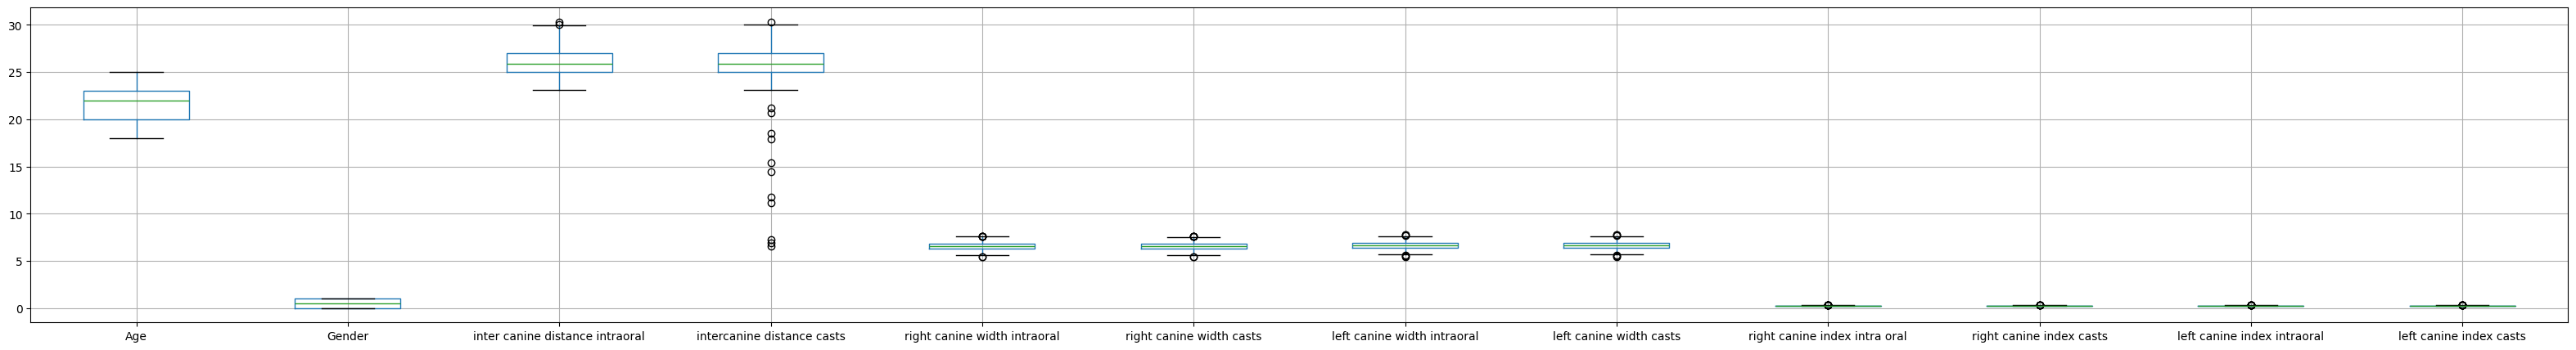

In [13]:
df.boxplot(figsize=(40,5))
plt.show()

In [14]:
def remove_outlier(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    iqr=q3-q1
    lower_range=q1-(1.5*iqr)
    upper_range=q3+(1.5*iqr)
    return lower_range,upper_range

In [15]:
for i in df.columns:
    low,high=remove_outlier(df[i])
    df[i]=np.where(df[i]>high,high,df[i])

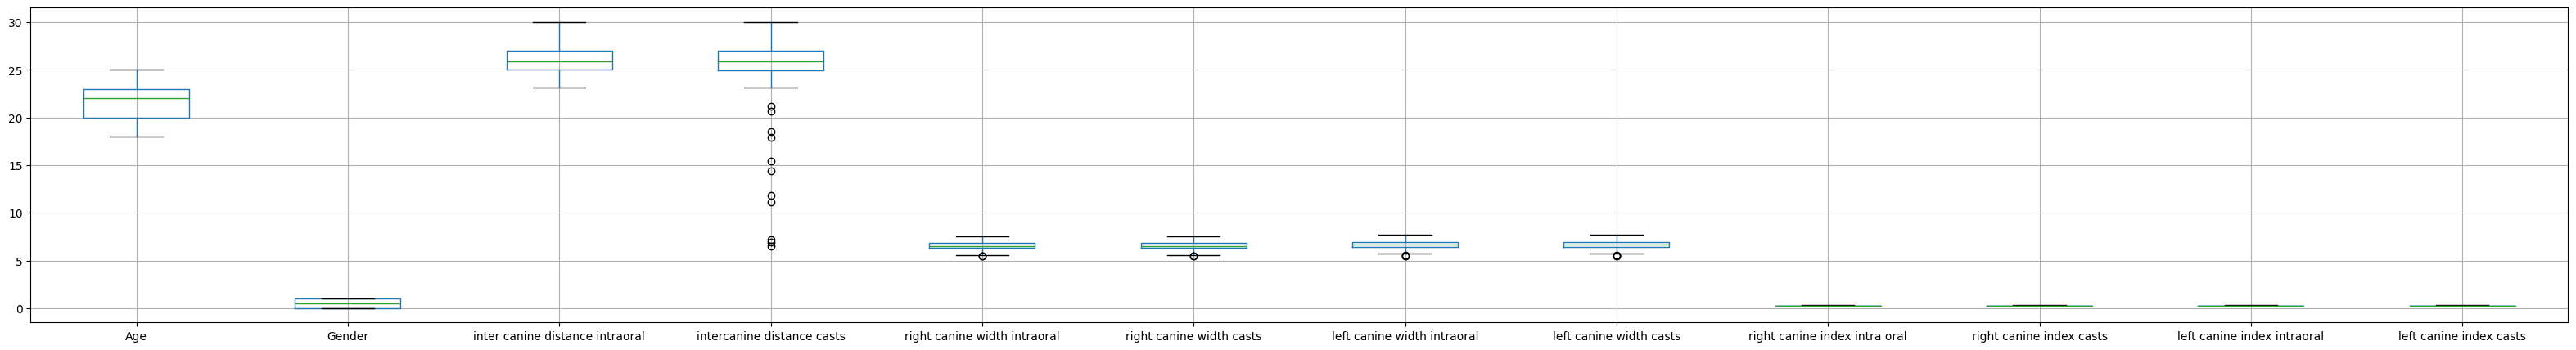

In [16]:
df.boxplot(figsize=(40,5))
plt.show()

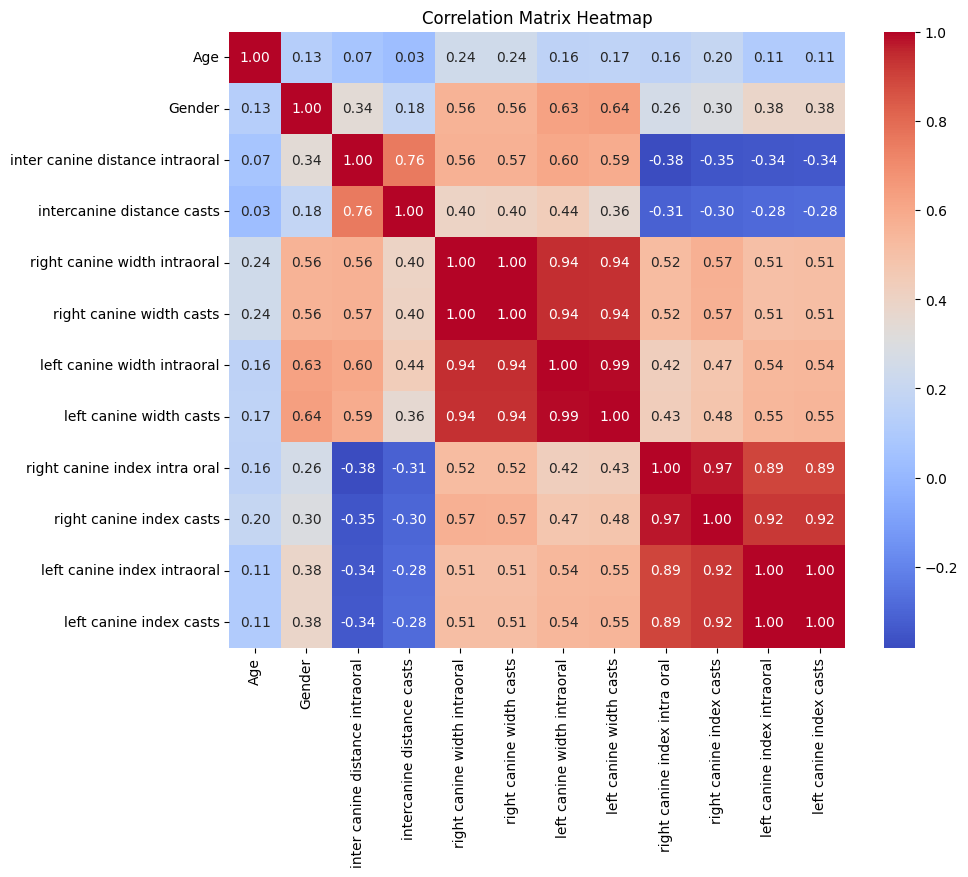

In [17]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [20]:
# Identify highly correlated features (Threshold: 0.85)
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.85:  # Only strong correlations
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Print highly correlated feature pairs
print("Highly Correlated Features (|𝝆| > 0.85):")
for pair in high_corr_pairs:
    print(pair)

Highly Correlated Features (|𝝆| > 0.85):
('right canine width casts', 'right canine width intraoral')
('left canine width intraoral', 'right canine width intraoral')
('left canine width intraoral', 'right canine width casts')
('left canine width casts', 'right canine width intraoral')
('left canine width casts', 'right canine width casts')
('left canine width casts', 'left canine width intraoral')
('right canine index casts', 'right canine index intra oral')
('left canine index intraoral', 'right canine index intra oral')
('left canine index intraoral', 'right canine index casts')
('left canine index casts', 'right canine index intra oral')
('left canine index casts', 'right canine index casts')
('left canine index casts', 'left canine index intraoral')


In [21]:
df.drop(columns=["right canine width casts",
                 "left canine width casts", "right canine index casts",
                 "left canine index casts"], inplace=True)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [24]:
from sklearn.linear_model import LogisticRegression

In [37]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)
print("Logistic regression")
print("train", model_lr.score(x_train, y_train))
print("test", model_lr.score(x_test, y_test))
log_pred = model_lr.predict(x_test)

Logistic regression
train 0.8142857142857143
test 0.8242424242424242


In [38]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train,y_train)
print("\nDecisionTreeClassifier")
print("Train",model_dt.score(x_train,y_train))
print("Test",model_dt.score(x_test,y_test))
dt_pred = model_dt.predict(x_test)


DecisionTreeClassifier
Train 1.0
Test 0.8696969696969697


In [39]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(x_train,y_train)
print("\RandomForestClassifier")
print("Train",model_rf.score(x_train,y_train))
print("Test",model_rf.score(x_test,y_test))
rf_pred = model_rf.predict(x_test)

\RandomForestClassifier
Train 1.0
Test 0.896969696969697


In [40]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(x_train, y_train)
print("\XGBClassifier")
print("Train",model_xgb.score(x_train,y_train))
print("Test",model_xgb.score(x_test,y_test))
xgb_pred = model_xgb.predict(x_test)

\XGBClassifier
Train 1.0
Test 0.896969696969697


In [43]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))

Logistic Regression Accuracy: 0.8242424242424242
Decision Tree Accuracy: 0.8696969696969697
Random Forest Accuracy: 0.896969696969697
XGBoost Accuracy: 0.896969696969697


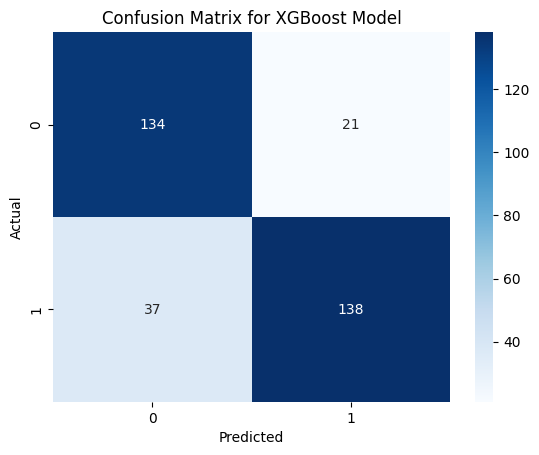

In [44]:
conf_matrix = confusion_matrix(y_test, log_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for XGBoost Model")
plt.show()

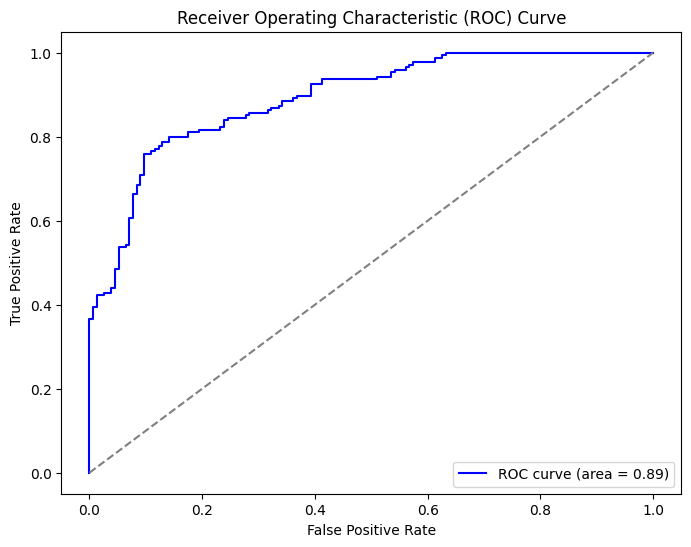

In [45]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, model_lr.predict_proba(x_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="blue", label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0,1], [0,1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()